In [1]:
import math
from denoising.datasets import load_bsd300
from denoising.datasets import load_dataset
from denoising.datasets import extract_patches
from denoising.datasets import add_noise

from denoising.metrics import psnr, ssim
from denoising.utils import normalize

from settings import BSD300_DIR

import logging

logging.basicConfig(level=logging.WARNING)

from denoising.methods.traditional.ksvd import KSVD

from images.visualization import show, show_images

In [2]:
imgs = load_bsd300(BSD300_DIR)
patches = extract_patches(imgs, begin=(0,0), stride=10,
    dimension=(50,50), quantity_per_image=(5,2))

y_train, y_test = load_dataset(patches, shuffle=True, split=(80,20))

mean = 0.0
variance = 0.01
std = math.sqrt(variance) # 0.1

x_train = add_noise(y_train, noise='gaussian', mean=mean, var=variance)
x_test = add_noise(y_test, noise='gaussian', mean=mean, var=variance)

In [3]:
x_test.shape

(600, 50, 50, 1)

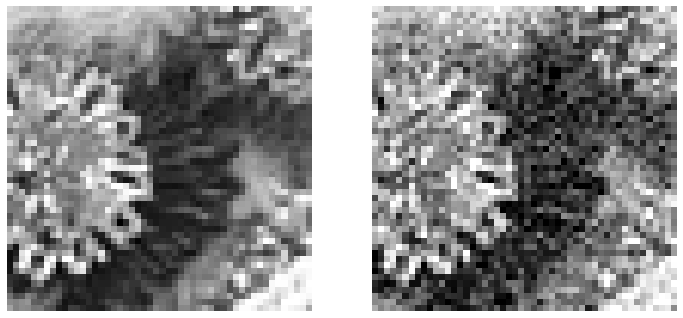

In [4]:
show_images(y_test[0], x_test[0])

In [5]:
# import logging 
# logging.basicConfig(level=logging.WARNING)

predicted = KSVD(x_test, noise_std_dev=std)

KeyboardInterrupt: 

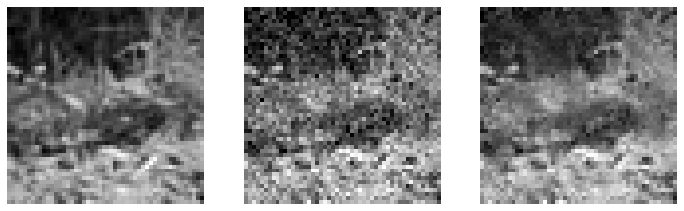

In [9]:
show_images(y_test[2], x_test[2], predicted[2])

In [12]:
from denoising.metrics import psnr

psnr(y_test[:10], normalize(x_test[:10], data_type='int')).mean()


20.116728592830746

In [13]:
psnr(y_test[:10], normalize(predicted[:10], data_type='int')).mean()

24.92999373789899

In [11]:
import matplotlib.pyplot as plt
from sparselandtools.applications.denoising import KSVDImageDenoiser
from sparselandtools.applications.utils import example_image
from sparselandtools.pursuits import MatchingPursuit
from sparselandtools.dictionaries import DCTDictionary

# load input image
# original_img = example_image('Barbara')
# noisy_img = example_image('Barbara', noise_std=20)

# set patch size
patch_size = 8

# initialize denoiser
initial_dictionary = DCTDictionary(patch_size, 11)
denoiser = KSVDImageDenoiser(initial_dictionary, pursuit=MatchingPursuit)

# denoise image
_4_iter, d, a = denoiser.denoise(x_test[0, :, :, 0], sigma=20, patch_size=patch_size,
                           n_iter=4)

_20_iter, d, a = denoiser.denoise(x_test[0, :, :, 0], sigma=20, patch_size=patch_size,
                           n_iter=20)

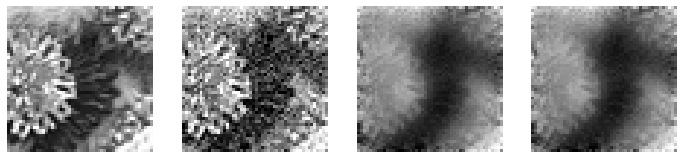

In [13]:
show_images(y_test[0, :, :], x_test[0, :, :], _4_iter.reshape(_4_iter.shape + (1,)), _20_iter.reshape(_20_iter.shape + (1,)))

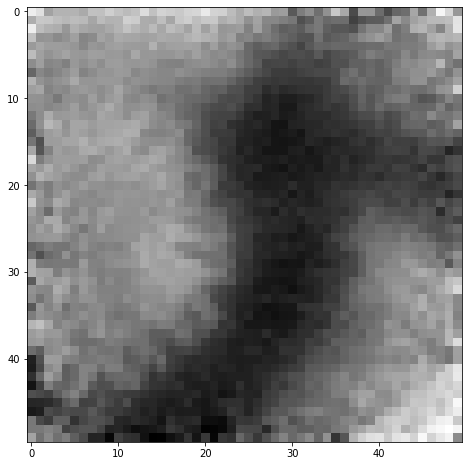

In [10]:
plt.figure(figsize=(12,8))
plt.imshow(z, cmap='gray')